In [24]:
# Change directory to the root of These for simpler imports
import os
os.chdir("/home/thibault/dev/these/")

# Imports
import csv
from MyCapytain.common.reference import URN
from collections import namedtuple, Counter
from helpers.treebanks import Filtered_Corpora
from pandas import DataFrame, Series
from IPython.display import display, HTML
from helpers.metadata import wordcounts 
import glob
import tqdm
from matplotlib import pyplot 

## Récupération des noms francais

In [39]:
noms = {}

# On ouvre le fichier qui contient les dates
with open("data/raw/datation.tsv") as f:
    reader = csv.DictReader(f, delimiter="\t")
    # Pour chacune des URN, on remplit avec le textgroup le dictionnaire data
    for line in reader:
        urn = line["URN"]
        # Si on a une URN et que cette ligne ne doit pas être ignorée
        if urn:
            textgroup = (URN(line.get("URN"))).upTo(URN.TEXTGROUP)
            noms[textgroup] = line.get("Nom FR")


## Présence de lascivus dans le corpus

In [40]:
corpus_dir = "data/curated/corpus/pie-http"
terms = "lascivvs", "mentvla"

counter = {term: Counter() for term in terms}

for file in tqdm.tqdm(glob.glob(os.path.join(corpus_dir, "**", "*txt"))):
    _, textgroup = os.path.split(os.path.dirname(file))
    textgroup = (URN(textgroup)).upTo(URN.TEXTGROUP)
    with open(file) as f:
        read = f.read()
        for term in terms:
            counter[term][noms[textgroup]] += read.count(term)



100%|██████████| 13774/13774 [00:00<00:00, 31028.74it/s]


/home/thibault/dev/these/these_env/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


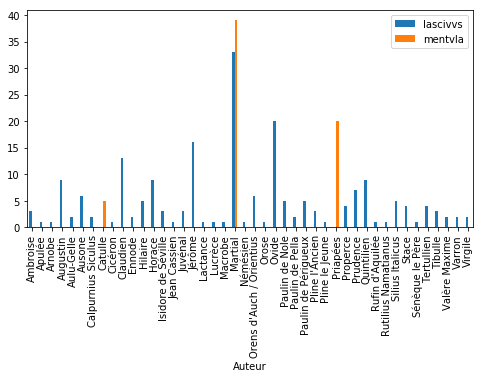

In [41]:
lascivus = DataFrame(counter)
lascivus.index.name = "Auteur"


fig, ax = pyplot.subplots(figsize =(8, 4)) 
ax = lascivus[(lascivus.lascivvs > 0) | (lascivus.mentvla > 0)].plot.bar(ax=ax)
fig.show()